##**1. Import Library**

In [1]:
# install rpy2 with 3.4.2 version for hypotesis testing purposes
!pip install -Iv rpy2==3.4.2

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.1/186.1 kB 4.8 MB/s eta 0:00:00
  Running command python setup.py egg_info
  /usr/local/lib/python3.10/dist-packages/setuptools/__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
  !!

          ********************************************************************************
          Requirements should be satisfied by a PEP 517 installer.
          If you are using pip, you can try `pip install --use-pep517`.
          ********************************************************************************

  !!
    dist.fetch_build_eggs(dist.setup_requires)
  ['cffi>=1.10.0', 'jinja2', 'pytz', 'tzlocal']
  running egg_info
  creating /tmp/pip-pip-egg-info-upd6gas6/rpy2.egg-info
  writing /tmp/pip-pip-egg-info-upd6gas6/rpy2

In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import fisher_exact
import rpy2.robjects.numpy2ri
from rpy2.robjects.packages import importr
rpy2.robjects.numpy2ri.activate()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**2. Load Dataset**

In [ ]:
# load dataset from google drive storage
df = pd.read_csv('/content/drive/MyDrive/4.Data Science Course/Personal Project/Student Mental Health/clean_dataset.csv')
df

,gender,age,study_programs,study_years,cgpa,marital_status,depression,anxiety,panic_attack,seeking_treatment,mental_health_issues,mental_health_category
0,female,18,engineering,year_1,3.00 - 3.49,no,yes,no,yes,no,yes,moderate
1,male,21,education,year_2,3.00 - 3.49,no,no,yes,no,no,yes,mild
2,male,19,information_tecnology,year_1,3.00 - 3.49,no,yes,yes,yes,no,yes,severe
3,female,22,law,year_3,3.00 - 3.49,yes,yes,no,no,no,yes,mild
4,male,23,mathematics,year_4,3.00 - 3.49,no,no,no,no,no,no,normal
...,...,...,...,...,...,...,...,...,...,...,...,...
95,female,21,computer_science,year_1,3.50 - 4.00,no,no,yes,no,no,yes,mild
96,male,18,engineering,year_2,3.00 - 3.49,no,yes,yes,no,no,yes,moderate
97,female,19,nursing,year_3,3.50 - 4.00,yes,yes,no,yes,no,yes,moderate
98,female,23,education,year_4,3.50 - 4.00,no,no,no,no,no,no,normal


##**3. Exploratory Data Analysis (EDA)**

###**a. Statistical Summary**

In [ ]:
# list the columns in the same data type
cat_var = [col for col in df.columns if (df[col].dtype=='O')]
num_var = [col for col in df.columns if (df[col].dtype=='int64') | (df[col].dtype=='float64') ]

In [ ]:
# check categorical variable
cat_var

NameError: ignored

In [ ]:
# check categorical variable
num_var

['age']

In [ ]:
# check descriptive statistics of categorical variables
df[cat_var].describe().T

,count,unique,top,freq
gender,100,2,female,75
study_programs,100,21,engineering,20
study_years,100,4,year_1,42
cgpa,100,5,3.50 - 4.00,48
marital_status,100,2,no,84
depression,100,2,no,65
anxiety,100,2,no,66
panic_attack,100,2,no,67
seeking_treatment,100,2,no,94
mental_health_issues,100,2,yes,64


In [ ]:
# check descriptive statistics of categorical variables
df[num_var].describe().T

,count,mean,std,min,25%,50%,75%,max
age,100.0,20.53,2.49628,18.0,18.0,19.0,23.0,24.0


###**b. Univariate Analysis**

####**Gender**

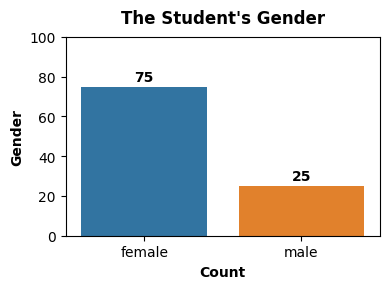

In [ ]:
# visualize each variable (gender) with sns.countplot() operator
plt.figure(figsize=(4,3))
ax= sns.countplot(data=df, x='gender', order= df['gender'].value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold', padding=2)
ax.set_ylim(0,100)
ax.set_title("The Student's Gender", weight='bold',pad= 10)
ax.set_xlabel('Count', weight='bold')
ax.set_ylabel('Gender', weight='bold')
plt.tight_layout()
plt.show()

> - Jumlah mahasiswa perempuan (75 orang) **lebih banyak** daripada laki-laki (25 orang)
>


####**Age**

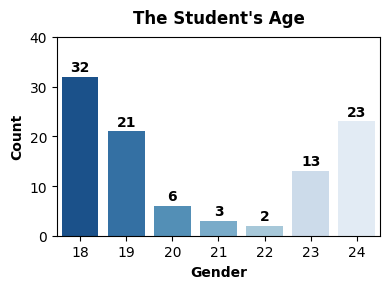

In [ ]:
# # visualize each variable (age) with sns.countplot() operator
plt.figure(figsize=(4,3))
ax= sns.countplot(data=df, x='age', palette="Blues_r")
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold', padding=2)
ax.set_ylim(0,40)
ax.set_title("The Student's Age", weight='bold',pad= 10)
ax.set_ylabel('Count', weight='bold')
ax.set_xlabel('Gender', weight='bold')
plt.tight_layout()
plt.show()

> - Mahasiswa usia 18 tahun (32 orang) menjadi yang **terbanyak** jumlahnya, diurutan ke-2 yaitu usia 24 tahun (23 orang), dan disusul usia 19 tahun (21 orang), dan seterusnya.
> - Mahasiswa usia 18, 19, 23, dan 24 secara perhitungan, masing-masing mewakili proporsi yang **cukup besar** dari total populasi umur yang ada jika dibandingkan dengan mahasiswa usia 20, 21, dan 22. 
> - Mahasiswa usia 22 memiliki proporsi **paling kecil**


####**Study Programs**

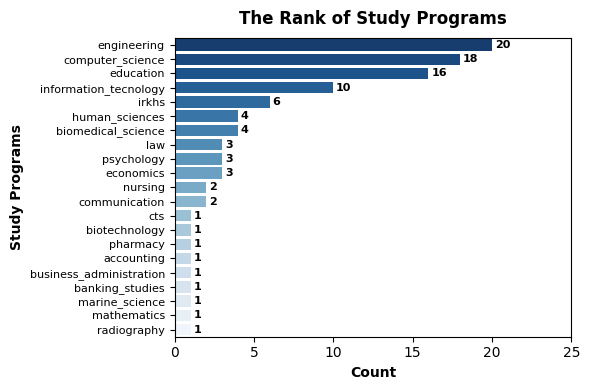

In [ ]:
# visualize each variable (study programs) with sns.countplot() operator
plt.figure(figsize=(6,4))
ax= sns.countplot(data=df, y='study_programs', palette="Blues_r", order= df['study_programs'].value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold',padding=2, fontsize=8)
ax.set_xlim(0,25)
ax.set_title("The Rank of Study Programs", weight='bold',pad= 10)
ax.tick_params(axis='y', labelsize=8)
ax.set_xlabel('Count', weight='bold')
ax.set_ylabel('Study Programs', weight='bold')
plt.tight_layout()
plt.show()

> - Terdapat **4 program studi** yang memiliki jumlah mahasiswa dengan proporsi **lebih banyak** daripada program studi lainnya. Diantaranya terbanyak pertama yaitu **engineering**, ke-2 ada **computer science**, ke-3 ada **pendidikan**, dan ke-4 ada **IT**.


####**Study Years**

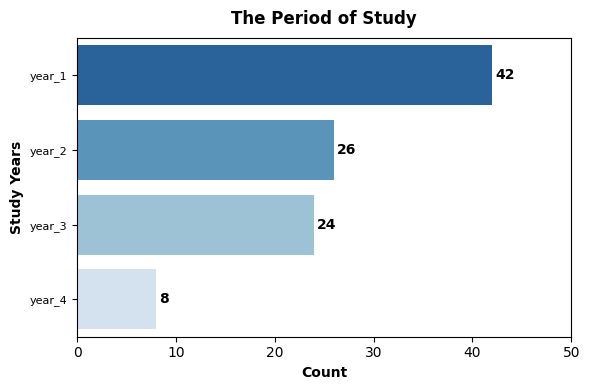

In [ ]:
# visualize each variable (study years) with sns.countplot() operator
plt.figure(figsize=(6,4))
ax= sns.countplot(data=df, y='study_years', palette="Blues_r", order= df['study_years'].value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold',padding=2)
ax.set_xlim(0,50)
ax.set_title("The Period of Study", weight='bold',pad= 10)
ax.tick_params(axis='y', labelsize=8)
ax.set_xlabel('Count', weight='bold')
ax.set_ylabel('Study Years', weight='bold')
plt.tight_layout()
plt.show()

> - Mahasiswa pada tahun pertama **paling banyak** jumlahnya daripada mahasiswa pada tahun lainnya.
> - Jumlah mahasiswa **paling sedikit** ada pada tahun ke empat. 

####**Cumulative GPA**

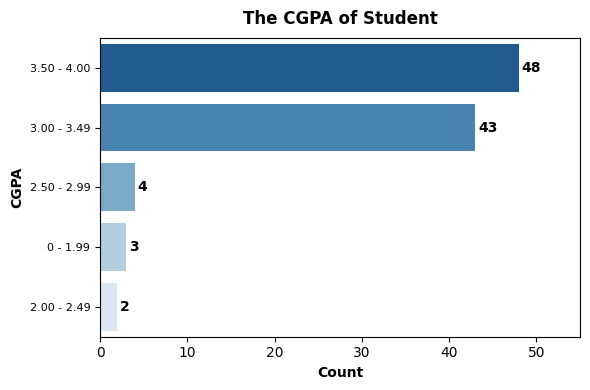

In [ ]:
# visualize each variable (CGPA) with sns.countplot() operator
plt.figure(figsize=(6,4))
ax= sns.countplot(data=df, y='cgpa', palette="Blues_r", order= df['cgpa'].value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold',padding=2)
ax.set_xlim(0,55)
ax.set_title("The CGPA of Student", weight='bold',pad= 10)
ax.tick_params(axis='y', labelsize=8)
ax.set_xlabel('Count', weight='bold')
ax.set_ylabel('CGPA', weight='bold')
plt.tight_layout()
plt.show()

> - Jumlah mahasiswa dengan CGPA (3.50 - 3.99) menjadi yang **paling banyak** dari total mahasiswa. lalu terbanyak ke-2 disusul oleh mahasiswa dengan CGPA (3.00 - 3.49).
> - Proporsi mahasiswa dengan CGPA (3.50 - 3.99) & (3.00 - 3.49) **lebih besar** daripada mahasiswa dengan CGPA (0.00- 2.99) berdasarkan populasi data yang ada.
> - Jumlah mahasiswa dengan CGPA (2.00 - 2.49) menjadi yang **paling sedikit**.

####**Marital Status**

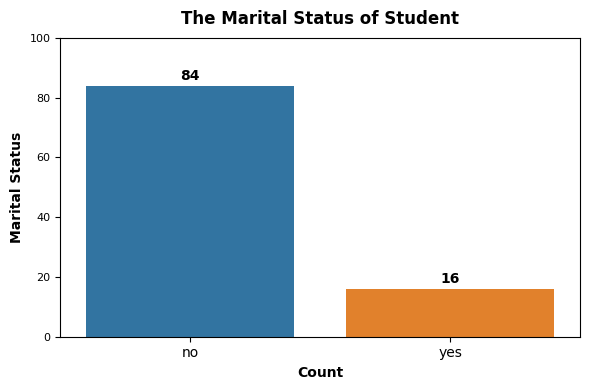

In [ ]:
# visualize each variable (marital status) with sns.countplot() operator
plt.figure(figsize=(6,4))
ax= sns.countplot(data=df, x='marital_status', order= df['marital_status'].value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold',padding=2)
ax.set_ylim(0,100)
ax.set_title("The Marital Status of Student", weight='bold',pad= 10)
ax.tick_params(axis='y', labelsize=8)
ax.set_xlabel('Count', weight='bold')
ax.set_ylabel('Marital Status', weight='bold')
plt.tight_layout()
plt.show()

> - **Mayoritas** mahasiswa **belum menikah** (84 orang) dan sedikit jumlahnya yang telah menikah (16 orang)

####**Mental Health Issues & Category**

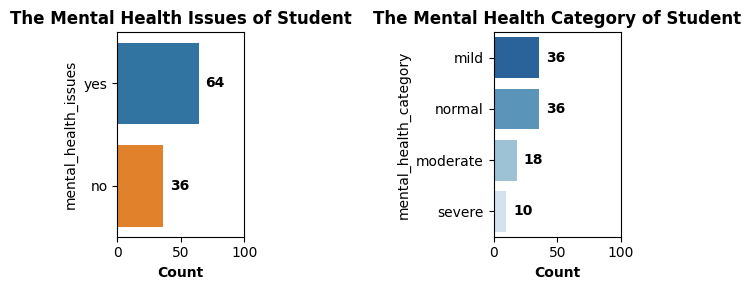

In [ ]:
# visualize each variable (mental health issues & mental health category) with sns.countplot() operator
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].set_title('The Mental Health Issues of Student', weight='bold')
axes[1].set_title('The Mental Health Category of Student', weight='bold')

# Plot countplot untuk kolom a
sns.countplot(data=df, 
              y='mental_health_issues',  
              order= df['mental_health_issues'].value_counts().index, 
              ax=axes[0])
for bars in axes[0].containers:
    axes[0].bar_label(bars, label_type='edge', weight='bold', padding=5)

# Plot countplot untuk kolom b
sns.countplot(data=df, 
              y='mental_health_category', 
              palette="Blues_r",
              order= df['mental_health_category'].value_counts().index,  
              ax=axes[1])
for bars in axes[1].containers:
    axes[1].bar_label(bars, label_type='edge', weight='bold', padding=5)

# Mengatur tata letak plot
axes[0].set_xlim(0,100)
axes[1].set_xlim(0,100)

# Mengatur tata letak plot
axes[0].set_xlabel('Count', weight='bold')
axes[1].set_xlabel('Count', weight='bold')

# Mengatur tata letak plot
plt.tight_layout(w_pad=10)

# Menampilkan plot
plt.show()

> - Jumlah mahasiswa yang memiliki masalah dengan kesehatan mental (64 orang) **lebih besar** jumlahnya daripada yang tidak (36 orang).
> - Mahasiswa yang memiliki masalah kesehatan mental dengan kategori ringan **paling banyak** jumlahnya dibandingkan dengan kategori sedang dan parah. 
> - Mahasiswa yang memiliki masalah kesehatan mental dengan kategori berat **paling sedikit** jumlahnya dibandingkan dengan kategori lainnya. 

####**Depression, Anxiety, Panic Attack, & Seeking Treatment**

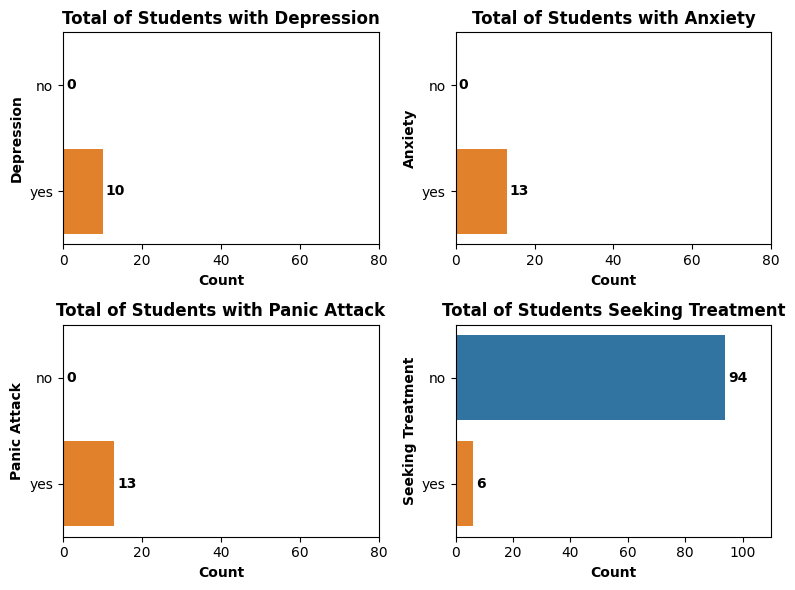

In [ ]:
# visualize each variable (depression, anxiety, panic attack, seeking treatment) with sns.countplot() operator
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes[0,0].set_title('Total of Students with Depression', weight='bold')
axes[0,1].set_title('Total of Students with Anxiety', weight='bold')
axes[1,0].set_title('Total of Students with Panic Attack', weight='bold')
axes[1,1].set_title('Total of Students Seeking Treatment', weight='bold')


# Plot countplot for depression columns
sns.countplot(data=df[(df['depression']=='yes') & (df['anxiety']=='no') & (df['panic_attack']=='no')], 
              y='depression', 
              order= df['depression'].value_counts().index, 
              ax=axes[0,0])
for bars in axes[0,0].containers:
    axes[0,0].bar_label(bars, label_type='edge', weight='bold', padding=2)

# Plot countplot for anxiety columns
sns.countplot(data=df[(df['depression']=='no') & (df['anxiety']=='yes') & (df['panic_attack']=='no')], 
              y='anxiety', 
              order= df['anxiety'].value_counts().index,  
              ax=axes[0,1])
for bars in axes[0,1].containers:
    axes[0,1].bar_label(bars, label_type='edge', weight='bold', padding=2)


# Plot countplot for depression columns
sns.countplot(data=df[(df['depression']=='no') & (df['anxiety']=='no') & (df['panic_attack']=='yes')], 
              y='panic_attack', 
              order= df['panic_attack'].value_counts().index,  
              ax=axes[1,0])
for bars in axes[1,0].containers:
    axes[1,0].bar_label(bars, label_type='edge', weight='bold', padding=2)

# Plot countplot for seeking treatment columns
sns.countplot(data=df, 
              y='seeking_treatment',
              order= df['seeking_treatment'].value_counts().index,  
              ax=axes[1,1])
for bars in axes[1,1].containers:
    axes[1,1].bar_label(bars, label_type='edge', weight='bold', padding=2)

# adjust plot
axes[0,0].set_xlim(0,80)
axes[0,1].set_xlim(0,80)
axes[1,0].set_xlim(0,80)
axes[1,1].set_xlim(0,110)

axes[0,0].set_xlabel('Count', weight='bold')
axes[0,1].set_xlabel('Count', weight='bold')
axes[1,0].set_xlabel('Count', weight='bold')
axes[1,1].set_xlabel('Count', weight='bold')
axes[0,0].set_ylabel('Depression', weight='bold')
axes[0,1].set_ylabel('Anxiety', weight='bold')
axes[1,0].set_ylabel('Panic Attack', weight='bold')
axes[1,1].set_ylabel('Seeking Treatment', weight='bold')

plt.tight_layout()

# show the plot
plt.show()

> - Jumlah mahasiswa yang memiliki masalah dengan kesehatan mental berupa **depresi** berjumlah **10 orang**.
> -  Jumlah mahasiswa yang memiliki masalah dengan kesehatan mental berupa **kecemasan** berjumlah **13 orang**. 
> - Jumlah mahasiswa yang memiliki masalah dengan kesehatan mental berupa **serangan panik** berjumlah **13 orang**. 
> - Jumlah mahasiswa yang mencari pengobatan kepada tenaga profesional berjumlah **6 orang**. 

###**c. Deep-Dive Questions**

####**1c. How is the mental health condition of students?**



#####- How many students have mental health issues?

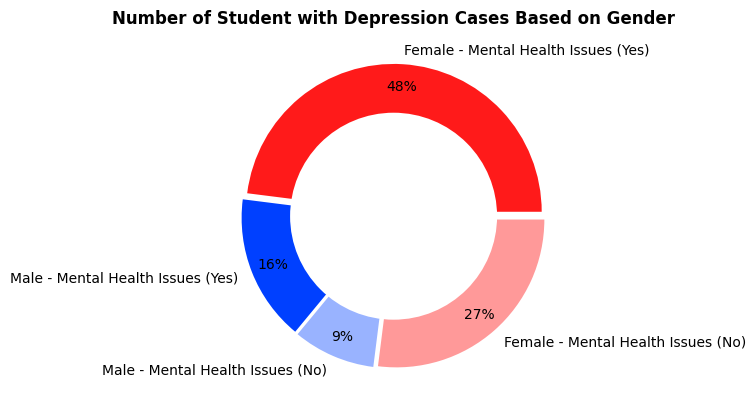

In [ ]:
# Menghitung jumlah mahasiswa yang terkena mental health issues berdasarkan gender
jumlah_laki_laki_mhi = df[(df['gender'] == 'male') & 
                              (df['mental_health_issues'] == 'yes')].shape[0] 
jumlah_perempuan_mhi =  df[(df['gender'] == 'female') & 
                              (df['mental_health_issues'] == 'yes')].shape[0]  
jumlah_laki_laki_no_mhi = df[(df['gender'] == 'male') & 
                              (df['mental_health_issues'] == 'no')].shape[0]  
jumlah_perempuan_no_mhi =  df[(df['gender'] == 'female') & 
                              (df['mental_health_issues'] == 'no')].shape[0]

# Data untuk donut plot
labels = ['Female - Mental Health Issues (Yes)',
          'Male - Mental Health Issues (Yes)', 
          'Male - Mental Health Issues (No)',
          'Female - Mental Health Issues (No)']
sizes = [jumlah_perempuan_mhi, jumlah_laki_laki_mhi, jumlah_laki_laki_no_mhi, jumlah_perempuan_no_mhi]
colors = ['#ff1a1a','#0040ff', '#99b3ff', '#ff9999']
explode = [0.03, 0.03, 0.03, 0.03]

# Pie Chart
plt.pie(sizes, 
        labels=labels, 
        colors=colors, 
        autopct='%1.0f%%',
        pctdistance=0.85,
        explode=explode)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Number of Student with Depression Cases Based on Gender', weight='bold')
 
# Displaying Chart
plt.show()

> - Persentase mahasiswa perempuan yang mengalami masalah kesehatan mental jumlahnya **lebih besar** daripada mahasiswa laki-laki yang mengalami masalah kesehatan mental (perempuan 48% : laki-laki 16%).

#####- How many students report that they are depressed?

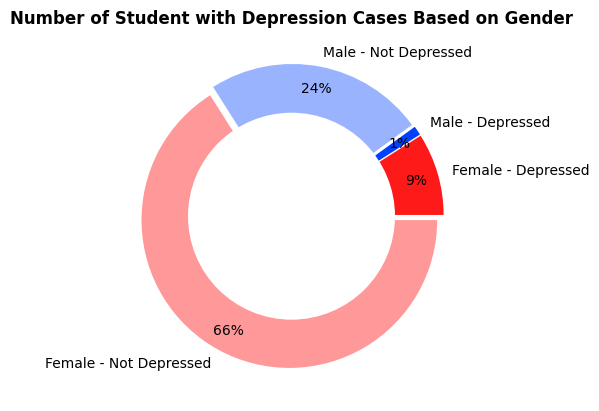

In [ ]:
# Menghitung jumlah mahasiswa yang terkena depresi dan yang tidak terkena depresi berdasarkan gender
populasi_laki_laki = df[df['gender'] == 'male'].shape[0]
populasi_perempuan = df[df['gender'] == 'female'].shape[0]

jumlah_laki_laki_depresi = df[(df['gender'] == 'male') & 
                              (df['depression'] == 'yes') &
                              (df['anxiety'] == 'no') &
                              (df['panic_attack'] == 'no')].shape[0]
jumlah_perempuan_depresi =  df[(df['gender'] == 'female') & 
                              (df['depression'] == 'yes') &
                              (df['anxiety'] == 'no') &
                              (df['panic_attack'] == 'no')].shape[0]
jumlah_laki_laki_tidak_depresi = populasi_laki_laki - jumlah_laki_laki_depresi
jumlah_perempuan_tidak_depresi = populasi_perempuan - jumlah_perempuan_depresi

# Data untuk donut plot
labels = ['Female - Depressed','Male - Depressed', 'Male - Not Depressed','Female - Not Depressed']
sizes = [jumlah_perempuan_depresi, jumlah_laki_laki_depresi, jumlah_laki_laki_tidak_depresi, jumlah_perempuan_tidak_depresi]
colors = ['#ff1a1a','#0040ff', '#99b3ff', '#ff9999']
explode = (0.03, 0.03, 0.03, 0.03)

# Pie Chart
plt.pie(sizes, 
        labels=labels, 
        colors=colors, 
        autopct='%1.0f%%',
        pctdistance=0.85,
        explode=explode)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Number of Student with Depression Cases Based on Gender', weight='bold')
 
# Displaying Chart
plt.show()


> - Persentase mahasiswa perempuan yang mengalami depresi jumlahnya **lebih besar** daripada mahasiswa laki-laki yang mengalami depresi (perempuan 9% : laki-laki 1%).

#####- How many students report that they are anxious?

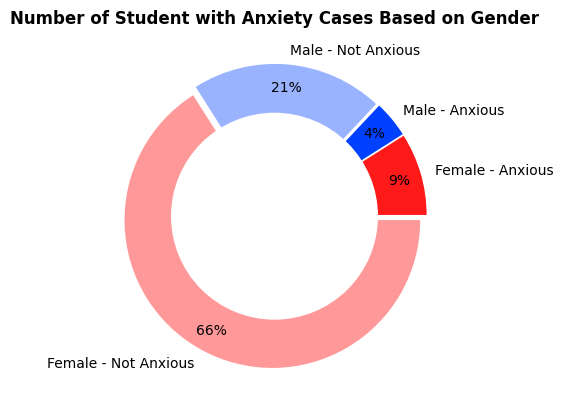

In [ ]:
# Menghitung jumlah mahasiswa yang terkena masalah kecemasan dan yang tidak berdasarkan gender
populasi_laki_laki = df[df['gender'] == 'male'].shape[0]
populasi_perempuan = df[df['gender'] == 'female'].shape[0]

jumlah_laki_laki_cemas = df[(df['gender'] == 'male') & 
                              (df['depression'] == 'no') &
                              (df['anxiety'] == 'yes') &
                              (df['panic_attack'] == 'no')].shape[0]
jumlah_perempuan_cemas=  df[(df['gender'] == 'female') & 
                              (df['depression'] == 'no') &
                              (df['anxiety'] == 'yes') &
                              (df['panic_attack'] == 'no')].shape[0]
jumlah_laki_laki_tidak_cemas = populasi_laki_laki - jumlah_laki_laki_cemas
jumlah_perempuan_tidak_cemas = populasi_perempuan - jumlah_perempuan_cemas 

# Data untuk donut plot
labels = ['Female - Anxious','Male - Anxious', 'Male - Not Anxious','Female - Not Anxious']
sizes = [jumlah_perempuan_cemas , jumlah_laki_laki_cemas , jumlah_laki_laki_tidak_cemas , jumlah_perempuan_tidak_cemas]
colors = ['#ff1a1a','#0040ff', '#99b3ff', '#ff9999']
explode = (0.03, 0.03, 0.03, 0.03)

# Pie Chart
plt.pie(sizes, 
        labels=labels, 
        colors=colors, 
        autopct='%1.0f%%',
        pctdistance=0.85,
        explode=explode)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Number of Student with Anxiety Cases Based on Gender', weight='bold')
 
# Displaying Chart
plt.show()


> - Persentase mahasiswa perempuan yang mengalami kecemasan 
jumlahnya **lebih besar** daripada mahasiswa laki-laki yang mengalami kecemasan (perempuan 9% : laki-laki 4%).

#####- How many students report having panic attacks?

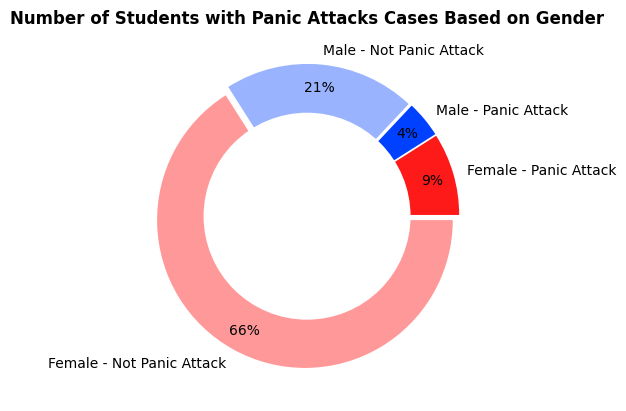

In [ ]:
# Menghitung jumlah mahasiswa yang terkena panic attack dan yang tidak  berdasarkan gender
populasi_laki_laki = df[df['gender'] == 'male'].shape[0]
populasi_perempuan = df[df['gender'] == 'female'].shape[0]

jumlah_laki_laki_panik = df[(df['gender'] == 'male') & 
                            (df['depression'] == 'no') &
                            (df['anxiety'] == 'no') &
                            (df['panic_attack'] == 'yes')].shape[0]
jumlah_perempuan_panik =  df[(df['gender'] == 'female') & 
                              (df['depression'] == 'no') &
                              (df['anxiety'] == 'no') &
                              (df['panic_attack'] == 'yes')].shape[0]
jumlah_laki_laki_tidak_panik = populasi_laki_laki - jumlah_laki_laki_panik
jumlah_perempuan_tidak_panik = populasi_perempuan - jumlah_perempuan_panik

# Data untuk donut plot
labels = ['Female - Panic Attack','Male - Panic Attack', 'Male - Not Panic Attack','Female - Not Panic Attack']
sizes = [jumlah_perempuan_panik , jumlah_laki_laki_panik , jumlah_laki_laki_tidak_panik , jumlah_perempuan_tidak_panik]
colors = ['#ff1a1a','#0040ff', '#99b3ff', '#ff9999']
explode = (0.03, 0.03, 0.03, 0.03)

# Pie Chart
plt.pie(sizes, 
        labels=labels, 
        colors=colors, 
        autopct='%1.0f%%',
        pctdistance=0.85,
        explode=explode)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Number of Students with Panic Attacks Cases Based on Gender', weight='bold')
 
# Displaying Chart
plt.show()

> - Persentase mahasiswa perempuan yang mengalami serangan panik jumlahnya **lebih besar** daripada mahasiswa laki-laki yang mengalami serangan panik (perempuan 9% : laki-laki 4%).

#####- How many students report that they are depressed and anxious?

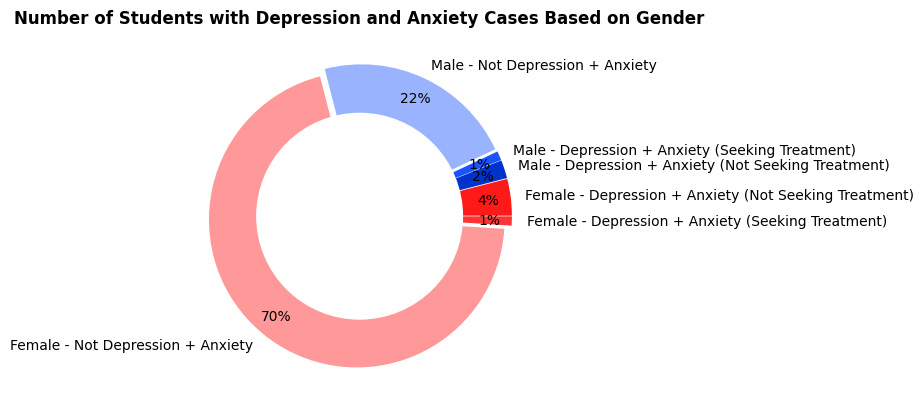

In [ ]:
# Menghitung jumlah mahasiswa yang terkena depresi + anxiety dan yang tidak berdasarkan gender
populasi_laki_laki = df[df['gender'] == 'male'].shape[0]
populasi_perempuan = df[df['gender'] == 'female'].shape[0]

male_dep_anx_no_trt= df[(df['gender'] == 'male') & 
                     (df['depression'] == 'yes') &
                     (df['anxiety'] == 'yes') &
                     (df['panic_attack'] == 'no') &
                     (df['seeking_treatment'] == 'no')].shape[0]
female_dep_anx_no_trt =  df[(df['gender'] == 'female') & 
                         (df['depression'] == 'yes') &
                         (df['anxiety'] == 'yes') &
                         (df['panic_attack'] == 'no') &
                         (df['seeking_treatment'] == 'no')].shape[0]
male_dep_anx_w_trt= df[(df['gender'] == 'male') & 
                     (df['depression'] == 'yes') &
                     (df['anxiety'] == 'yes') &
                     (df['panic_attack'] == 'no') &
                     (df['seeking_treatment'] == 'yes')].shape[0]
female_dep_anx_w_trt =  df[(df['gender'] == 'female') & 
                         (df['depression'] == 'yes') &
                         (df['anxiety'] == 'yes') &
                         (df['panic_attack'] == 'no') &
                         (df['seeking_treatment'] == 'yes')].shape[0]                        
p_male_dep_anx_no_trt =  male_dep_anx_no_trt 
p_female_dep_anx_no_trt  =  female_dep_anx_no_trt
p_male_dep_anx_w_trt =  male_dep_anx_w_trt
p_female_dep_anx_w_trt  =  female_dep_anx_w_trt
p_male_no_dep_anx = (populasi_laki_laki - (male_dep_anx_no_trt + male_dep_anx_w_trt))
p_female_no_dep_anx = (populasi_perempuan - (female_dep_anx_no_trt + female_dep_anx_w_trt))

# Data untuk donut plot
labels = ['Female - Depression + Anxiety (Not Seeking Treatment)',
          'Male - Depression + Anxiety (Not Seeking Treatment)',
          'Male - Depression + Anxiety (Seeking Treatment)',
          'Male - Not Depression + Anxiety',
          'Female - Not Depression + Anxiety',
          'Female - Depression + Anxiety (Seeking Treatment)']
sizes = [p_female_dep_anx_no_trt,
         p_male_dep_anx_no_trt,
         p_male_dep_anx_w_trt,
         p_male_no_dep_anx,
         p_female_no_dep_anx,
         p_female_dep_anx_w_trt]
color = ['#ff1a1a','#0033cc','#1a53ff','#99b3ff','#ff9999','#ff3333']
explode = (0.03, 0.03, 0.03, 0.03, 0.03, 0.03)

# Pie Chart
plt.pie(sizes, 
        labels=labels, 
        colors=color, 
        autopct='%1.0f%%',
        pctdistance=0.85,
        explode=explode)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Number of Students with Depression and Anxiety Cases Based on Gender', weight='bold')
 
# Displaying Chart
plt.show()

> - Persentase mahasiswa perempuan yang mengalami depresi + kecemasan serta tidak mencari pengobatan jumlahnya **lebih besar** daripada mahasiswa laki-laki yang mengalami depresi + kecemasan serta tidak mencari pengobatan (perempuan 4% : laki-laki 2%). 
> - Sedangkan persentase mahasiswa perempuan yang mengalami depresi + kecemasan tetapi mencari pengobatan jumlahnya **sama** dengan mahasiswa laki-laki yang mengalami depresi + kecemasan tetapi mencari pengobatan (perempuan 1% : laki-laki 1%).

#####- How many students report that they are depressed and have panic attacks?

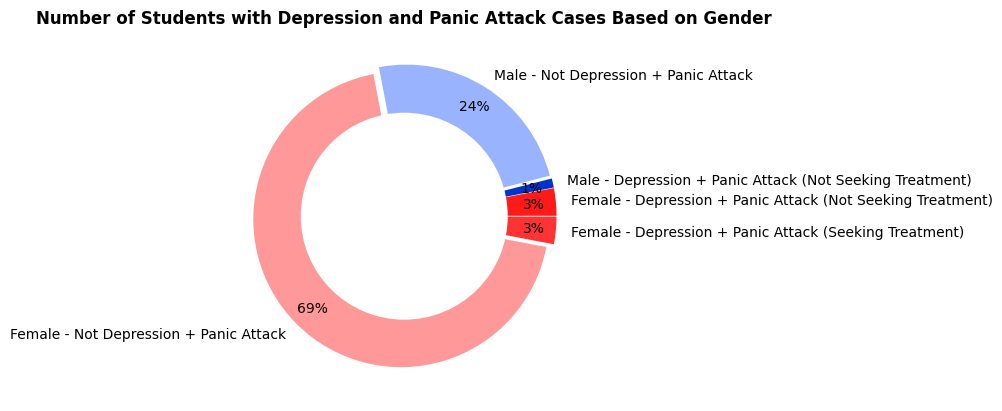

In [ ]:
# Menghitung jumlah mahasiswa yang terkena depresi + panic attack dan yang tidak berdasarkan gender
populasi_laki_laki = df[df['gender'] == 'male'].shape[0]
populasi_perempuan = df[df['gender'] == 'female'].shape[0]

male_dep_pnc_no_trt= df[(df['gender'] == 'male') & 
                     (df['depression'] == 'yes') &
                     (df['anxiety'] == 'no') &
                     (df['panic_attack'] == 'yes') &
                     (df['seeking_treatment'] == 'no')].shape[0]
female_dep_pnc_no_trt =  df[(df['gender'] == 'female') & 
                         (df['depression'] == 'yes') &
                         (df['anxiety'] == 'no') &
                         (df['panic_attack'] == 'yes') &
                         (df['seeking_treatment'] == 'no')].shape[0]
male_dep_pnc_w_trt= df[(df['gender'] == 'male') & 
                     (df['depression'] == 'yes') &
                     (df['anxiety'] == 'no') &
                     (df['panic_attack'] == 'yes') &
                     (df['seeking_treatment'] == 'yes')].shape[0]
female_dep_pnc_w_trt =  df[(df['gender'] == 'female') & 
                         (df['depression'] == 'yes') &
                         (df['anxiety'] == 'no') &
                         (df['panic_attack'] == 'yes') &
                         (df['seeking_treatment'] == 'yes')].shape[0]                        
p_male_dep_pnc_no_trt =  male_dep_pnc_no_trt 
p_female_dep_pnc_no_trt  =  female_dep_pnc_no_trt
p_male_dep_pnc_w_trt =  male_dep_pnc_w_trt
p_female_dep_pnc_w_trt  =  female_dep_pnc_w_trt
p_male_no_dep_pnc = (populasi_laki_laki - (male_dep_pnc_no_trt + male_dep_pnc_w_trt))
p_female_no_dep_pnc = (populasi_perempuan - (female_dep_pnc_no_trt + female_dep_pnc_w_trt))

# Data untuk donut plot
labels = ['Female - Depression + Panic Attack (Not Seeking Treatment)',
          'Male - Depression + Panic Attack (Not Seeking Treatment)',
          'Male - Not Depression + Panic Attack',
          'Female - Not Depression + Panic Attack',
          'Female - Depression + Panic Attack (Seeking Treatment)']
sizes = [p_female_dep_pnc_no_trt,
         p_male_dep_pnc_no_trt,
         p_male_no_dep_pnc,
         p_female_no_dep_pnc,
         p_female_dep_pnc_w_trt]
color = ['#ff1a1a','#0033cc','#99b3ff','#ff9999','#ff3333']
explode = (0.03, 0.03, 0.03, 0.03, 0.03)

# Pie Chart
plt.pie(sizes, 
        labels=labels, 
        colors=color, 
        autopct='%1.0f%%',
        pctdistance=0.85,
        explode=explode)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Number of Students with Depression and Panic Attack Cases Based on Gender', weight='bold')
 
# Displaying Chart
plt.show()

> - Persentase mahasiswa perempuan yang mengalami depresi + serangan panik serta tidak mencari pengobatan jumlahnya **lebih besar** daripada mahasiswa laki-laki yang mengalami depresi + kecemasan serta tidak mencari pengobatan (perempuan 3% : laki-laki 1%). 
> - Terlihat dari diagram diatas, **hanya** ada 3 mahasiswa perempuan yang mengalami depresi + serangan panik tetapi mencari pengobatan (perempuan 3%). Sedangkan laki-laki yang yang mengalami depresi + serangan panik tetapi mencari pengobatan **tidak ada** dari data.

#####- How many students reported that they were anxious and have panic attacks?

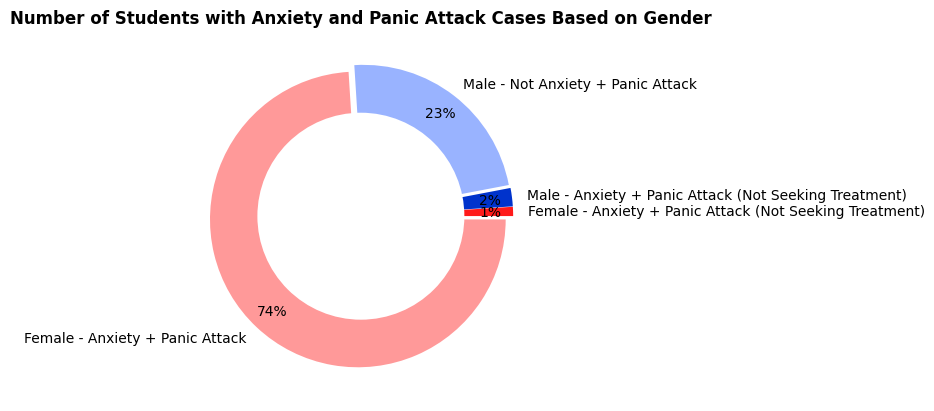

In [ ]:
# Menghitung jumlah mahasiswa yang terkena anxiety + panic attack dan yang tidak berdasarkan gender
populasi_laki_laki = df[df['gender'] == 'male'].shape[0]
populasi_perempuan = df[df['gender'] == 'female'].shape[0]

male_anx_pnc_no_trt= df[(df['gender'] == 'male') & 
                     (df['depression'] == 'no') &
                     (df['anxiety'] == 'yes') &
                     (df['panic_attack'] == 'yes') &
                     (df['seeking_treatment'] == 'no')].shape[0]
female_anx_pnc_no_trt =  df[(df['gender'] == 'female') & 
                         (df['depression'] == 'no') &
                         (df['anxiety'] == 'yes') &
                         (df['panic_attack'] == 'yes') &
                         (df['seeking_treatment'] == 'no')].shape[0]
male_anx_pnc_w_trt= df[(df['gender'] == 'male') & 
                     (df['depression'] == 'no') &
                     (df['anxiety'] == 'yes') &
                     (df['panic_attack'] == 'yes') &
                     (df['seeking_treatment'] == 'yes')].shape[0]
female_anx_pnc_w_trt =  df[(df['gender'] == 'female') & 
                         (df['depression'] == 'no') &
                         (df['anxiety'] == 'yes') &
                         (df['panic_attack'] == 'yes') &
                         (df['seeking_treatment'] == 'yes')].shape[0]                        
p_male_anx_pnc_no_trt =  male_anx_pnc_no_trt 
p_female_anx_pnc_no_trt  =  female_anx_pnc_no_trt
p_male_anx_pnc_w_trt =  male_anx_pnc_w_trt
p_female_anx_pnc_w_trt  =  female_anx_pnc_w_trt
p_male_no_anx_pnc = (populasi_laki_laki - (male_anx_pnc_no_trt + male_anx_pnc_w_trt))
p_female_no_anx_pnc = (populasi_perempuan - (female_anx_pnc_no_trt + female_anx_pnc_w_trt))

# Data untuk donut plot
labels = ['Female - Anxiety + Panic Attack (Not Seeking Treatment)',
          'Male - Anxiety + Panic Attack (Not Seeking Treatment)',
          'Male - Not Anxiety + Panic Attack',
          'Female - Anxiety + Panic Attack']
sizes = [p_female_anx_pnc_no_trt,
         p_male_anx_pnc_no_trt,
         p_male_no_anx_pnc,
         p_female_no_anx_pnc]
color = ['#ff1a1a','#0033cc','#99b3ff','#ff9999']
explode = (0.03, 0.03, 0.03, 0.03)

# Pie Chart
plt.pie(sizes, 
        labels=labels, 
        colors=color, 
        autopct='%1.0f%%',
        pctdistance=0.85,
        explode=explode)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Number of Students with Anxiety and Panic Attack Cases Based on Gender', weight='bold')
 
# Displaying Chart
plt.show()

> - Persentase mahasiswa laki-laki yang mengalami kecemasan + serangan panik serta tidak mencari pengobatan jumlahnya **lebih besar** daripada mahasiswa perempuan yang mengalami kecemasan + serangan panik serta tidak mencari pengobatan (laki-laki 2% : perempuan 1%). 
> - Terlihat dari diagram diatas, baik mahasiswa perempuan maupun laki-laki yang mengalami kecemasan + serangan panik tetapi mencari pengobatan **tidak ada** dari data.

#####- How many students reported that they were depressed, anxious, and have panic attacks?

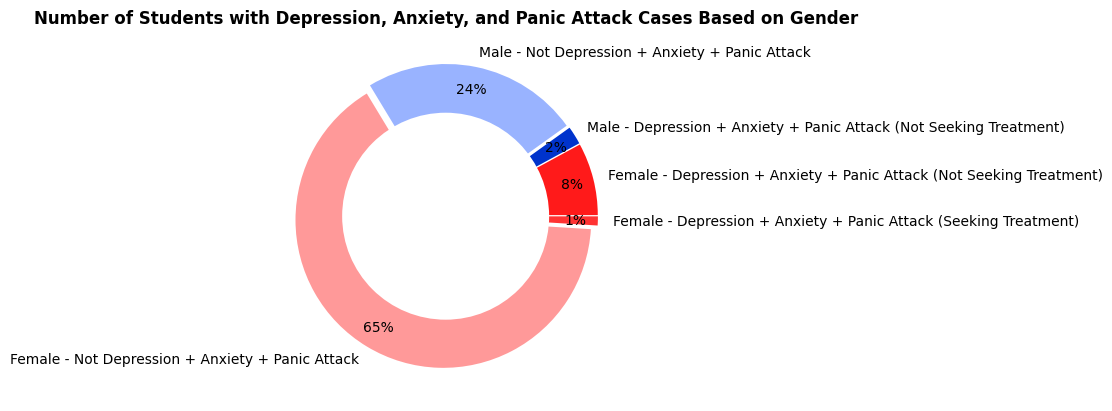

In [ ]:
# Menghitung jumlah mahasiswa yang terkena depresi + anxiety + panic attack dan yang tidak berdasarkan gender
populasi_laki_laki = df[df['gender'] == 'male'].shape[0]
populasi_perempuan = df[df['gender'] == 'female'].shape[0]

male_dep_anx_pnc_no_trt= df[(df['gender'] == 'male') & 
                     (df['depression'] == 'yes') &
                     (df['anxiety'] == 'yes') &
                     (df['panic_attack'] == 'yes') &
                     (df['seeking_treatment'] == 'no')].shape[0]
female_dep_anx_pnc_no_trt =  df[(df['gender'] == 'female') & 
                         (df['depression'] == 'yes') &
                         (df['anxiety'] == 'yes') &
                         (df['panic_attack'] == 'yes') &
                         (df['seeking_treatment'] == 'no')].shape[0]
male_dep_anx_pnc_w_trt= df[(df['gender'] == 'male') & 
                     (df['depression'] == 'yes') &
                     (df['anxiety'] == 'yes') &
                     (df['panic_attack'] == 'yes') &
                     (df['seeking_treatment'] == 'yes')].shape[0]
female_dep_anx_pnc_w_trt =  df[(df['gender'] == 'female') & 
                         (df['depression'] == 'yes') &
                         (df['anxiety'] == 'yes') &
                         (df['panic_attack'] == 'yes') &
                         (df['seeking_treatment'] == 'yes')].shape[0]                        
p_male_dep_anx_pnc_no_trt =  male_dep_anx_pnc_no_trt 
p_female_dep_anx_pnc_no_trt  =  female_dep_anx_pnc_no_trt
p_male_dep_anx_pnc_w_trt =  male_dep_anx_pnc_w_trt
p_female_dep_anx_pnc_w_trt  =  female_dep_anx_pnc_w_trt
p_male_no_dep_anx_pnc = (populasi_laki_laki - (male_dep_anx_pnc_no_trt + male_dep_anx_pnc_w_trt))
p_female_no_dep_anx_pnc = (populasi_perempuan - (female_dep_anx_pnc_no_trt + female_dep_anx_pnc_w_trt))

# Data untuk donut plot
labels = ['Female - Depression + Anxiety + Panic Attack (Not Seeking Treatment)',
          'Male - Depression + Anxiety + Panic Attack (Not Seeking Treatment)',
          'Male - Not Depression + Anxiety + Panic Attack' ,
          'Female - Not Depression + Anxiety + Panic Attack' ,
          'Female - Depression + Anxiety + Panic Attack (Seeking Treatment)']
sizes = [p_female_dep_anx_pnc_no_trt,
         p_male_dep_anx_no_trt,
         p_male_no_dep_anx_pnc,
         p_female_no_dep_anx_pnc,
         p_female_dep_anx_pnc_w_trt]
color = ['#ff1a1a','#0033cc','#99b3ff','#ff9999','#ff3333']
explode = (0.03, 0.03, 0.03, 0.03, 0.03)

# Pie Chart
plt.pie(sizes, 
        labels=labels, 
        colors=color, 
        autopct='%1.0f%%',
        pctdistance=0.85,
        explode=explode)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Number of Students with Depression, Anxiety, and Panic Attack Cases Based on Gender', weight='bold')
 
# Displaying Chart
plt.show()

> - Persentase mahasiswa perempuan yang mengalami depresi + kecemasan + serangan panik serta tidak mencari pengobatan jumlahnya **lebih besar** daripada mahasiswa laki-laki yang mengalami depresi + kecemasan serta tidak mencari pengobatan (perempuan 8% : laki-laki 2%). 
> - Terlihat dari diagram diatas, **hanya** ada 1 mahasiswa perempuan yang mengalami depresi + kecemasan + serangan panik tetapi mencari pengobatan (perempuan 1%). Sedangkan laki-laki yang yang mengalami depresi + kecemasan + serangan panik tetapi mencari pengobatan **tidak ada** dari data.

###**2c. How about the study program?**







#####- How many students have mental health issues based on study program?

In [ ]:
std_mtl = df.groupby(['study_programs','mental_health_issues']).agg({
          'gender':[('total_student','count')]})
std_mtl = std_mtl.query('mental_health_issues == "yes"')
std_mtl.columns = std_mtl.columns.droplevel()
std_mtl = std_mtl.sort_values('total_student', ascending=False)
std_mtl.reset_index(inplace=True)
std_mtl

,study_programs,mental_health_issues,total_student
0,engineering,yes,12
1,computer_science,yes,11
2,education,yes,11
3,information_tecnology,yes,10
4,economics,yes,3
5,human_sciences,yes,3
6,irkhs,yes,3
7,law,yes,3
8,communication,yes,2
9,psychology,yes,2


In [ ]:
gndr_std_mtl1 = df[df['mental_health_issues'] == 'yes'].groupby(['study_programs', 'gender']).size().reset_index(name='total_student')
gndr_std_mtl1 = gndr_std_mtl1.pivot_table(index='study_programs', columns='gender', values='total_student', fill_value=0)
gndr_std_mtl1['total_students'] = gndr_std_mtl1.sum(axis=1)
gndr_std_mtl1 = gndr_std_mtl1.sort_values(by=['total_students', 'female', 'male'], ascending=False)

gndr_std_mtl1



gender,female,male,total_students
study_programs,,,
engineering,8,4,12
education,8,3,11
computer_science,7,4,11
information_tecnology,7,3,10
economics,3,0,3
law,3,0,3
human_sciences,2,1,3
irkhs,2,1,3
communication,2,0,2


In [ ]:
df.study_programs.value_counts()

engineering                20
computer_science           18
education                  16
information_tecnology      10
irkhs                       6
human_sciences              4
biomedical_science          4
law                         3
psychology                  3
economics                   3
nursing                     2
communication               2
cts                         1
biotechnology               1
pharmacy                    1
accounting                  1
business_administration     1
banking_studies             1
marine_science              1
mathematics                 1
radiography                 1
Name: study_programs, dtype: int64

#####- What mental health category is most common in students based on study programs?

In [ ]:
mhi_cat_pvt = df[df['mental_health_issues'] == 'yes'].groupby(['study_programs', 'mental_health_category']).size().reset_index(name='total_student')
mhi_cat_pvt = mhi_cat_pvt.pivot_table(index='study_programs', columns='mental_health_category', values='total_student', fill_value=0)
mhi_cat_pvt['total_students'] = mhi_cat_pvt.sum(axis=1)
mhi_cat_pvt= mhi_cat_pvt.sort_values(by=['total_students'], ascending=False)

mhi_cat_pvt

mental_health_category,mild,moderate,severe,total_students
study_programs,,,,
engineering,7,5,0,12
computer_science,7,3,1,11
education,7,3,1,11
information_tecnology,6,0,4,10
economics,1,1,1,3
human_sciences,1,2,0,3
irkhs,2,1,0,3
law,2,1,0,3
communication,1,0,1,2


In [ ]:
mhi_cat_pvt = df[df['mental_health_issues'] == 'yes'].groupby(['study_programs', 'mental_health_category', 'gender']).size().reset_index(name='total_student')
mhi_cat_pvt = mhi_cat_pvt.pivot_table(index='study_programs', columns=['mental_health_category', 'gender'], values='total_student', fill_value=0)
mhi_cat_pvt['total_students'] = mhi_cat_pvt.sum(axis=1)
mhi_cat_pvt = mhi_cat_pvt.sort_values(by='total_students', ascending=False)

mhi_cat_pvt.columns = mhi_cat_pvt.columns.droplevel()
mhi_cat_pvt.columns = ['Mild (Female)', 'Mild (Male)', 'Moderate (Female)', 'Moderate (Male)', 'Severe (Female)', 'Severe (Male)', 'Total Students']
mhi_cat_pvt.columns = [col.center(15) for col in mhi_cat_pvt.columns]

mhi_cat_pvt


,Mild (Female),Mild (Male),Moderate (Female),Moderate (Male),Severe (Female),Severe (Male),Total Students
study_programs,,,,,,,
engineering,5,2,3,2,0,0,12
computer_science,5,2,1,2,1,0,11
education,4,3,3,0,1,0,11
information_tecnology,4,2,0,0,3,1,10
economics,1,0,1,0,1,0,3
human_sciences,1,0,1,1,0,0,3
irkhs,2,0,0,1,0,0,3
law,2,0,1,0,0,0,3
communication,1,0,0,0,1,0,2


###**3c. How about the CGPA?**







#####- How many students have mental health issues based on CGPA?

In [ ]:
cgpa_mtl = df.groupby(['cgpa','mental_health_issues']).agg({
          'gender':[('total_student','count')]})
cgpa_mtl = cgpa_mtl.query('mental_health_issues == "yes"')
cgpa_mtl.columns = cgpa_mtl.columns.droplevel()
cgpa_mtl = cgpa_mtl.sort_values('total_student', ascending=False)
cgpa_mtl.reset_index(inplace=True)
cgpa_mtl

,cgpa,mental_health_issues,total_student
0,3.50 - 4.00,yes,31
1,3.00 - 3.49,yes,28
2,2.50 - 2.99,yes,3
3,0 - 1.99,yes,1
4,2.00 - 2.49,yes,1


#####- What mental health category is most common in students based on CGPA?

In [ ]:
cgpa_mhi_pvt = df[df['mental_health_issues'] == 'yes'].groupby(['cgpa', 'mental_health_category']).size().reset_index(name='total_student')
cgpa_mhi_pvt = cgpa_mhi_pvt.pivot_table(index='cgpa', columns='mental_health_category', values='total_student', fill_value=0)
cgpa_mhi_pvt['total_students'] = cgpa_mhi_pvt.sum(axis=1)
cgpa_mhi_pvt= cgpa_mhi_pvt.sort_values(by=['total_students'], ascending=False)
cgpa_mhi_pvt

mental_health_category,mild,moderate,severe,total_students
cgpa,,,,
3.50 - 4.00,17,9,5,31
3.00 - 3.49,17,7,4,28
2.50 - 2.99,0,2,1,3
0 - 1.99,1,0,0,1
2.00 - 2.49,1,0,0,1


In [ ]:
cgpa_mhi_pvt = df[df['mental_health_issues'] == 'yes'].groupby(['cgpa', 'mental_health_category', 'gender']).size().reset_index(name='total_student')
cgpa_mhi_pvt = cgpa_mhi_pvt.pivot_table(index='cgpa', columns=['mental_health_category', 'gender'], values='total_student', fill_value=0)
cgpa_mhi_pvt['total_students'] = cgpa_mhi_pvt.sum(axis=1)
cgpa_mhi_pvt = cgpa_mhi_pvt.sort_values(by='total_students', ascending=False)

cgpa_mhi_pvt.columns = cgpa_mhi_pvt.columns.droplevel()
cgpa_mhi_pvt.columns = ['Mild (Female)', 'Mild (Male)', 'Moderate (Female)', 'Moderate (Male)', 'Severe (Female)', 'Severe (Male)', 'Total Students']
cgpa_mhi_pvt.columns = [col.center(15) for col in cgpa_mhi_pvt.columns]

cgpa_mhi_pvt


,Mild (Female),Mild (Male),Moderate (Female),Moderate (Male),Severe (Female),Severe (Male),Total Students
cgpa,,,,,,,
3.50 - 4.00,13,4,6,3,5,0,31
3.00 - 3.49,13,4,4,3,3,1,28
2.50 - 2.99,0,0,2,0,1,0,3
0 - 1.99,1,0,0,0,0,0,1
2.00 - 2.49,0,1,0,0,0,0,1


###**4c. How about the Marital Status?**







#####- How many students have mental health issues based on marital status?

In [ ]:
marital_mhi = df.groupby(['marital_status','mental_health_issues']).agg({
          'gender':[('total_student','count')]})
marital_mhi = marital_mhi.query('mental_health_issues == "yes"')
marital_mhi.columns = marital_mhi.columns.droplevel()
marital_mhi = marital_mhi.sort_values('total_student', ascending=False)
marital_mhi.reset_index(inplace=True)
marital_mhi

,marital_status,mental_health_issues,total_student
0,no,yes,48
1,yes,yes,16


#####- What mental health category is most common in students based on marital status?

In [ ]:
marital_mhi_pvt = df[df['mental_health_issues'] == 'yes'].groupby(['marital_status', 'mental_health_category']).size().reset_index(name='total_student')
marital_mhi_pvt = marital_mhi_pvt.pivot_table(index='marital_status', columns='mental_health_category', values='total_student', fill_value=0)
marital_mhi_pvt['total_students'] = marital_mhi_pvt.sum(axis=1)
marital_mhi_pvt= marital_mhi_pvt.sort_values(by=['total_students'], ascending=False)
marital_mhi_pvt

mental_health_category,mild,moderate,severe,total_students
marital_status,,,,
no,32,11,5,48
yes,4,7,5,16


In [ ]:
marital_mhi_pvt = df[df['mental_health_issues'] == 'yes'].groupby(['marital_status', 'mental_health_category', 'gender']).size().reset_index(name='total_student')
marital_mhi_pvt = marital_mhi_pvt.pivot_table(index='marital_status', columns=['mental_health_category', 'gender'], values='total_student', fill_value=0)
marital_mhi_pvt['total_students'] = marital_mhi_pvt.sum(axis=1)
marital_mhi_pvt = marital_mhi_pvt.sort_values(by='total_students', ascending=False)

marital_mhi_pvt.columns = marital_mhi_pvt.columns.droplevel()
marital_mhi_pvt.columns = ['Mild (Female)', 'Mild (Male)', 'Moderate (Female)', 'Moderate (Male)', 'Severe (Female)', 'Severe (Male)', 'Total Students']
marital_mhi_pvt.columns = [col.center(15) for col in marital_mhi_pvt.columns]

marital_mhi_pvt


,Mild (Female),Mild (Male),Moderate (Female),Moderate (Male),Severe (Female),Severe (Male),Total Students
marital_status,,,,,,,
no,23,9,8,3,4,1,48
yes,4,0,4,3,5,0,16


> - Dari tabel pivot, terlihat bahwa mahasiswa yang telah menikah kebanyakan mengalami masalah kesehatan mental dengan kategori sedang. Sedangkan yang belum menikah kebanyakan mengalami masalah kesehatan mental dengan kategori ringan. Hal ini dapat diasumsikan bahwa ada kemungkinan masalah kesehatan mental menjadi lebih kompleks jika mahasiswa telah menikah. Tentunya asumsi ini perlu didukung oleh bukti-bukti yang lebih kuat melalui pengujian tertentu.

###**5c. How about the Study Years?**







#####- How many students have mental health issues based on study years?

In [ ]:
std_yrs_mhi = df.groupby(['study_years','mental_health_issues']).agg({
          'gender':[('total_student','count')]})
std_yrs_mhi = std_yrs_mhi.query('mental_health_issues == "yes"')
std_yrs_mhi.columns = std_yrs_mhi.columns.droplevel()
std_yrs_mhi = std_yrs_mhi.sort_values('total_student', ascending=False)
std_yrs_mhi.reset_index(inplace=True)
std_yrs_mhi

,study_years,mental_health_issues,total_student
0,year_1,yes,25
1,year_2,yes,19
2,year_3,yes,18
3,year_4,yes,2


#####- What mental health category is most common in students based on study years?

In [ ]:
std_yrs_mhi_pvt = df[df['mental_health_issues'] == 'yes'].groupby(['study_years', 'mental_health_category']).size().reset_index(name='total_student')
std_yrs_mhi_pvt = std_yrs_mhi_pvt.pivot_table(index='study_years', columns='mental_health_category', values='total_student', fill_value=0)
std_yrs_mhi_pvt['total_students'] = std_yrs_mhi_pvt.sum(axis=1)
std_yrs_mhi_pvt= std_yrs_mhi_pvt.sort_values(by=['total_students'], ascending=False)
std_yrs_mhi_pvt

mental_health_category,mild,moderate,severe,total_students
study_years,,,,
year_1,12,9,4,25
year_2,12,5,2,19
year_3,11,4,3,18
year_4,1,0,1,2


In [ ]:
std_yrs_mhi_pvt = df[df['mental_health_issues'] == 'yes'].groupby(['study_years', 'mental_health_category', 'gender']).size().reset_index(name='total_student')
std_yrs_mhi_pvt = std_yrs_mhi_pvt.pivot_table(index='study_years', columns=['mental_health_category', 'gender'], values='total_student', fill_value=0)
std_yrs_mhi_pvt['total_students'] = std_yrs_mhi_pvt.sum(axis=1)
std_yrs_mhi_pvt = std_yrs_mhi_pvt.sort_values(by='total_students', ascending=False)

std_yrs_mhi_pvt.columns = std_yrs_mhi_pvt.columns.droplevel()
std_yrs_mhi_pvt.columns = ['Mild (Female)', 'Mild (Male)', 'Moderate (Female)', 'Moderate (Male)', 'Severe (Female)', 'Severe (Male)', 'Total Students']
std_yrs_mhi_pvt.columns = [col.center(15) for col in std_yrs_mhi_pvt.columns]

std_yrs_mhi_pvt

,Mild (Female),Mild (Male),Moderate (Female),Moderate (Male),Severe (Female),Severe (Male),Total Students
study_years,,,,,,,
year_1,10,2,7,2,3,1,25
year_2,6,6,2,3,2,0,19
year_3,10,1,3,1,3,0,18
year_4,1,0,0,0,1,0,2


###**6c. How about the Age?**







#####- How many students have mental health issues based on age?

In [ ]:
age_mhi = df.groupby(['age','mental_health_issues']).agg({
          'gender':[('total_student','count')]})
age_mhi = age_mhi.query('mental_health_issues == "yes"')
age_mhi.columns = age_mhi.columns.droplevel()
age_mhi = age_mhi.sort_values('total_student', ascending=False)
age_mhi.reset_index(inplace=True)
age_mhi

,age,mental_health_issues,total_student
0,18,yes,22
1,24,yes,15
2,19,yes,13
3,23,yes,7
4,20,yes,4
5,21,yes,2
6,22,yes,1


#####- What mental health category is most common in students based on age?

In [ ]:
age_mhi_pvt = df[df['mental_health_issues'] == 'yes'].groupby(['age','mental_health_category']).size().reset_index(name='total_student')
age_mhi_pvt = age_mhi_pvt.pivot_table(index='age', columns='mental_health_category', values='total_student', fill_value=0)
age_mhi_pvt['total_students'] = age_mhi_pvt.sum(axis=1)
age_mhi_pvt= age_mhi_pvt.sort_values(by=['total_students'], ascending=False)
age_mhi_pvt

mental_health_category,mild,moderate,severe,total_students
age,,,,
18,12,8,2,22
24,10,2,3,15
19,6,4,3,13
23,3,3,1,7
20,2,1,1,4
21,2,0,0,2
22,1,0,0,1


In [ ]:
age_mhi_pvt = df[df['mental_health_issues']=='yes'].groupby(['age', 'mental_health_category', 'gender']).size().reset_index(name='total_student')
age_mhi_pvt = age_mhi_pvt.pivot_table(index='age', columns=['mental_health_category', 'gender'], values='total_student', fill_value=0)
age_mhi_pvt['total_students'] = age_mhi_pvt.sum(axis=1)
age_mhi_pvt = age_mhi_pvt.sort_values(by='total_students', ascending=False)

age_mhi_pvt.columns = age_mhi_pvt.columns.droplevel()
age_mhi_pvt.columns = ['Mild (Female)', 'Mild (Male)', 'Moderate (Female)', 'Moderate (Male)', 'Severe (Female)', 'Severe (Male)', 'Total Students']
age_mhi_pvt.columns = [col.center(15) for col in age_mhi_pvt.columns]

age_mhi_pvt

,Mild (Female),Mild (Male),Moderate (Female),Moderate (Male),Severe (Female),Severe (Male),Total Students
age,,,,,,,
18,11,1,3,5,2,0,22
24,6,4,2,0,3,0,15
19,4,2,3,1,2,1,13
23,2,1,3,0,1,0,7
20,2,0,1,0,1,0,4
21,1,1,0,0,0,0,2
22,1,0,0,0,0,0,1


In [ ]:
std_mtl= df.groupby(['cgpa','gender','marital_status','mental_health_issues']).agg({
          'gender':[('total_student','count')]})
std_mtl = std_mtl.query('mental_health_issues == "yes" and marital_status == "yes"')
std_mtl.columns = std_mtl.columns.droplevel()
std_mtl = std_mtl.sort_values('total_student', ascending=False)
std_mtl.reset_index(inplace=True)
std_mtl

,cgpa,gender,marital_status,mental_health_issues,total_student
0,3.50 - 4.00,female,yes,yes,6
1,3.00 - 3.49,female,yes,yes,5
2,2.50 - 2.99,female,yes,yes,2
3,3.00 - 3.49,male,yes,yes,2
4,3.50 - 4.00,male,yes,yes,1


In [ ]:
std_mtl= df.groupby(['cgpa','gender','marital_status','mental_health_issues']).agg({
          'gender':[('total_student','count')]})
std_mtl = std_mtl.query('mental_health_issues == "yes" and marital_status == "no"')
std_mtl.columns = std_mtl.columns.droplevel()
std_mtl = std_mtl.sort_values('total_student', ascending=False)
std_mtl.reset_index(inplace=True)
std_mtl

,cgpa,gender,marital_status,mental_health_issues,total_student
0,3.50 - 4.00,female,no,yes,18
1,3.00 - 3.49,female,no,yes,15
2,3.00 - 3.49,male,no,yes,6
3,3.50 - 4.00,male,no,yes,6
4,0 - 1.99,female,no,yes,1
5,2.00 - 2.49,male,no,yes,1
6,2.50 - 2.99,female,no,yes,1


In [ ]:
std_mtl= df.groupby(['study_programs','cgpa','gender','marital_status','mental_health_issues']).agg({
          'gender':[('total_student','count')]})
std_mtl = std_mtl.query('mental_health_issues == "no" and marital_status == "no" and cgpa < "3.00 - 3.49"')
std_mtl.columns = std_mtl.columns.droplevel()
std_mtl = std_mtl.sort_values('total_student', ascending=False)
std_mtl.reset_index(inplace=True)
std_mtl

,study_programs,cgpa,gender,marital_status,mental_health_issues,total_student
0,biomedical_science,0 - 1.99,male,no,no,1
1,biotechnology,0 - 1.99,female,no,no,1
2,engineering,2.00 - 2.49,female,no,no,1
3,human_sciences,2.50 - 2.99,female,no,no,1


In [ ]:
std_mtl= df.groupby(['study_programs','cgpa','gender','marital_status','mental_health_issues', 'mental_health_category']).agg({
          'gender':[('total_student','count')]})
std_mtl = std_mtl.query('mental_health_issues == "yes" and marital_status == "yes" and cgpa < "3.00 - 3.49"')
std_mtl.columns = std_mtl.columns.droplevel()
std_mtl = std_mtl.sort_values('total_student', ascending=False)
std_mtl.reset_index(inplace=True)
std_mtl

,study_programs,cgpa,gender,marital_status,mental_health_issues,mental_health_category,total_student
0,engineering,2.50 - 2.99,female,yes,yes,moderate,1
1,human_sciences,2.50 - 2.99,female,yes,yes,moderate,1


In [ ]:
df[(df['cgpa']=='3.50 - 4.00') & 
   (df['gender']=='female') & 
   (df['mental_health_category']=='severe')]

,gender,age,study_programs,study_years,cgpa,marital_status,depression,anxiety,panic_attack,seeking_treatment,mental_health_issues,mental_health_category
19,female,18,marine_science,year_2,3.50 - 4.00,yes,yes,yes,yes,no,yes,severe
24,female,23,computer_science,year_3,3.50 - 4.00,no,yes,yes,yes,no,yes,severe
28,female,24,information_tecnology,year_3,3.50 - 4.00,yes,yes,yes,yes,yes,yes,severe
79,female,24,communication,year_2,3.50 - 4.00,yes,yes,yes,yes,no,yes,severe
86,female,18,psychology,year_1,3.50 - 4.00,no,yes,yes,yes,no,yes,severe


In [ ]:
std_mtl= df.groupby(['cgpa','gender','marital_status','mental_health_issues','mental_health_category']).agg({
          'gender':[('total_student','count')]})
std_mtl = std_mtl.query('mental_health_issues == "yes" and marital_status == "yes" and cgpa < "3.00 - 3.49"')
std_mtl.columns = std_mtl.columns.droplevel()
std_mtl = std_mtl.sort_values('total_student', ascending=False)
std_mtl.reset_index(inplace=True)
std_mtl

,cgpa,gender,marital_status,mental_health_issues,mental_health_category,total_student
0,2.50 - 2.99,female,yes,yes,moderate,2


In [ ]:
std_mtl= df.groupby(['cgpa','gender','marital_status','mental_health_issues']).agg({
          'gender':[('total_student','count')]})
std_mtl = std_mtl.query('mental_health_issues == "yes" and marital_status == "no" and cgpa >= "3.00 - 3.49"')
std_mtl.columns = std_mtl.columns.droplevel()
std_mtl = std_mtl.sort_values('total_student', ascending=False)
std_mtl.reset_index(inplace=True)
std_mtl

,cgpa,gender,marital_status,mental_health_issues,total_student
0,3.50 - 4.00,female,no,yes,18
1,3.00 - 3.49,female,no,yes,15
2,3.00 - 3.49,male,no,yes,6
3,3.50 - 4.00,male,no,yes,6


In [ ]:
std_mtl= df.groupby(['study_years','gender','marital_status','mental_health_issues']).agg({
          'gender':[('total_student','count')]})
std_mtl = std_mtl.query('mental_health_issues == "yes"')
std_mtl.columns = std_mtl.columns.droplevel()
std_mtl = std_mtl.sort_values('total_student', ascending=False)
std_mtl.reset_index(inplace=True)
std_mtl

,study_years,gender,marital_status,mental_health_issues,total_student
0,year_1,female,no,yes,19
1,year_3,female,no,yes,10
2,year_2,male,no,yes,7
3,year_3,female,yes,yes,6
4,year_1,male,no,yes,5
5,year_2,female,no,yes,5
6,year_2,female,yes,yes,5
7,year_2,male,yes,yes,2
8,year_1,female,yes,yes,1
9,year_3,male,no,yes,1


In [ ]:
std_yrs_mhi_pvt = df[df['mental_health_issues'] == 'yes'].groupby(['study_years', 'marital_status', 'gender']).size().reset_index(name='total_student')
std_yrs_mhi_pvt = std_yrs_mhi_pvt.pivot_table(index='study_years', columns=['marital_status', 'gender'], values='total_student', fill_value=0)
std_yrs_mhi_pvt['total_student'] = std_yrs_mhi_pvt.sum(axis=1)
std_yrs_mhi_pvt = std_yrs_mhi_pvt.drop(columns='total_student')

std_yrs_mhi_pvt.columns = std_yrs_mhi_pvt.columns.droplevel()
std_yrs_mhi_pvt.columns = ['No_Married_Female', 'No_Married_Male', 'Married_Female', 'Married_Male']
std_yrs_mhi_pvt.columns = [col.center(15) for col in std_yrs_mhi_pvt.columns]

std_yrs_mhi_pvt

,No_Married_Female,No_Married_Male,Married_Female,Married_Male
study_years,,,,
year_1,19,5,1,0
year_2,5,7,5,2
year_3,10,1,6,1
year_4,1,0,1,0


<Figure size 800x600 with 0 Axes>

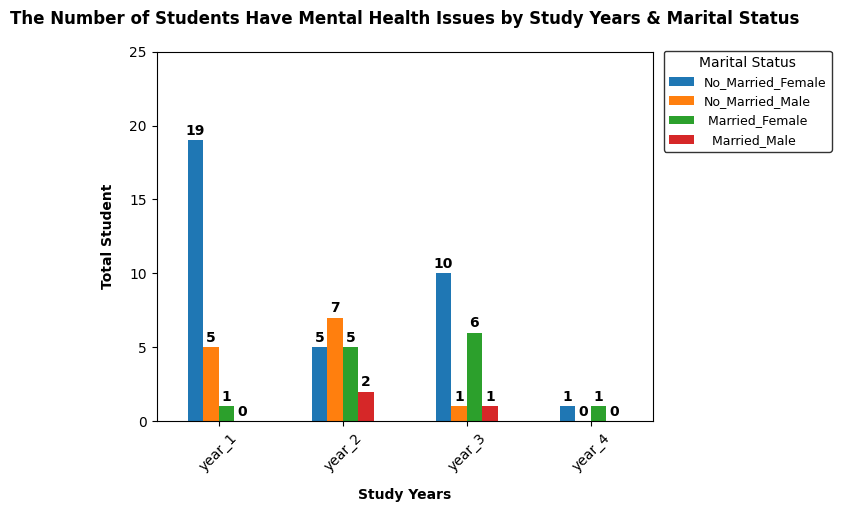

In [ ]:
# plot the pivot table as a bar plot
plt.figure(figsize=(8,6))
ax= std_yrs_mhi_pvt.plot.bar()
for bars in ax.containers:
    ax.bar_label(bars, label_type= 'edge',weight='bold',padding=2)
    ax.legend(title= 'Marital Status', bbox_to_anchor=(1.01,1.02), 
          loc='upper left', edgecolor='black', fontsize=9)
plt.xticks(rotation = 45)
plt.ylim(0,25)
plt.title('The Number of Students Have Mental Health Issues by Study Years & Marital Status', weight='bold', pad=20)
plt.xlabel('Study Years', weight='bold', labelpad=10)
plt.ylabel('Total Student', weight='bold', labelpad=10)
plt.show()

In [ ]:
test= df.groupby(['gender','age','study_years',]).size().reset_index(name='total_student')
test = test.pivot_table(index=['gender','age'], columns=['study_years'], values='total_student', fill_value=0)
test['total_student'] = test.sum(axis=1)
test = test.drop(columns='total_student')
test

study_years  year_1  year_2  year_3  year_4
gender age                                 
female 18        13       5       4       2
       19         8       3       5       0
       20         1       2       2       0
       21         1       0       0       0
       22         0       0       1       1
       23         4       2       2       1
       24         6       3       6       3
male   18         3       5       0       0
       19         3       1       1       0
       20         0       1       0       0
       21         1       1       0       0
       23         1       1       1       1
       24         1       2       2       0

##**D. Hypothesis Testing**

#####- Does Gender affect the emergence of mental health problems?

In [ ]:
# check with contingency table 
table = pd.crosstab(df['gender'], df['mental_health_issues'])
table

mental_health_issues,no,yes
gender,,
female,27,48
male,9,16


In [ ]:
# check expected frequency from contigency table
chi2, p_value, dof, expected = chi2_contingency(table)
expected_frequency = chi2_contingency(table).expected_freq

# use if else operator to execute hypotesis testing prompt
if (expected_frequency < 5.00).any():
      print('-' * 40)
      print("menggunakan uji fisher's exact test")
      print('-' * 40)
      # Melakukan fisher's exact test
      stats = importr('stats')
      contingency_table = table.values.T
      res = stats.fisher_test(contingency_table)
      print('p-value: {}'.format(res[0][0]))
      # Keputusan Hipotesis
      if res[0][0] >0.05:
         print('Keputusan Hipotesis: Menerima H0, Menolak H1')
         print('Asumsi diterima: Gender Tidak Berpengaruh Terhadap Mental Health Issues')
      else:
         print('Keputusan Hipotesis: Menolak H0, Menerima H1')
         print('Asumsi diterima: Gender Berpengaruh Terhadap Mental Health Issues')

elif (expected_frequency >= 5.00).any():
      print('-' * 40)
      print("menggunakan uji chi-square independen")
      print('-' * 40)
      # Melakukan chi-squre test
      chi2, p_value, dof, expected = chi2_contingency(table)
      p_value = chi2_contingency(table).pvalue
      print('P-Value:',p_value)
      # Keputusan Hipotesis
      if chi2_contingency(table).pvalue>0.05:
         print('Keputusan Hipotesis: Menerima H0, Menolak H1')
         print('Asumsi diterima: Gender Tidak Berpengaruh Terhadap Mental Health Issues')
      else:
         print('Keputusan Hipotesis: Menolak H0, Menerima H1')
         print('Asumsi diterima: Gender Berpengaruh Terhadap Mental Mental Health Issues')

----------------------------------------
menggunakan uji chi-square independen
----------------------------------------
P-Value: 1.0
Keputusan Hipotesis: Menerima H0, Menolak H1
Asumsi diterima: Gender Tidak Berpengaruh Terhadap Mental Health Issues


#####- Does marital status affect the emergence of mental health problems?

In [ ]:
# check with contingency table 
table = pd.crosstab(df['marital_status'], df['mental_health_issues'])
table

mental_health_issues,no,yes
marital_status,,
no,36,48
yes,0,16


In [ ]:
# check expected frequency from contigency table
chi2, p_value, dof, expected = chi2_contingency(table)
expected_frequency = chi2_contingency(table).expected_freq

# use if else operator to execute hypotesis testing prompt
if (expected_frequency < 5.00).any():
      print('-' * 40)
      print("menggunakan uji fisher's exact test")
      print('-' * 40)
      # Melakukan fisher's exact test
      stats = importr('stats')
      contingency_table = table.values
      res = stats.fisher_test(contingency_table)
      print('p-value: {}'.format(res[0][0]))
      # Keputusan Hipotesis
      if res[0][0] >0.05:
         print('Keputusan Hipotesis: Menerima H0, Menolak H1')
         print('Asumsi diterima: Marital status Tidak Berpengaruh Terhadap Mental Health Issues')
      else:
         print('Keputusan Hipotesis: Menolak H0, Menerima H1')
         print('Asumsi diterima: Marital status Berpengaruh Terhadap Mental Health Issues')

elif (expected_frequency >= 5.00).any():
      print('----------')
      print("menggunakan uji chi-square independen")
      print('----------')
      # Melakukan chi-squre test
      chi2, p_value, dof, expected = chi2_contingency(table)
      p_value = chi2_contingency(table).pvalue
      print('P-Value:',p_value)
      # Keputusan Hipotesis
      if chi2_contingency(table).pvalue>0.05:
         print('Keputusan Hipotesis: Menerima H0, Menolak H1')
         print('Asumsi diterima: Marital Status Tidak Berpengaruh Terhadap Mental Health Issues')
      else:
         print('Keputusan Hipotesis: Menolak H0, Menerima H1')
         print('Asumsi diterima: Marital Status Berpengaruh Terhadap Mental Health Issues')

----------
menggunakan uji chi-square independen
----------
P-Value: 0.0027977263249496184
Keputusan Hipotesis: Menolak H0, Menerima H1
Asumsi diterima: Marital Status Berpengaruh Terhadap Mental Health Issues


#####- Does marital status affect the CGPA scores?

In [ ]:
# check with contingency table 
table = pd.crosstab(df['marital_status'], df['cgpa'])
table

cgpa,0 - 1.99,2.00 - 2.49,2.50 - 2.99,3.00 - 3.49,3.50 - 4.00
marital_status,,,,,
no,3,2,2,36,41
yes,0,0,2,7,7


In [ ]:
# check expected frequency from contigency table
chi2, p_value, dof, expected = chi2_contingency(table)
expected_frequency = chi2_contingency(table).expected_freq

# use if else operator to execute hypotesis testing prompt
if (expected_frequency < 5.00).any():
      print('-' * 40)
      print("menggunakan uji fisher's exact test")
      print('-' * 40)
      # Melakukan fisher's exact test
      stats = importr('stats')
      contingency_table = table.values
      res = stats.fisher_test(contingency_table)
      print('p-value: {}'.format(res[0][0]))
      # Keputusan Hipotesis
      if res[0][0] >0.05:
         print('Keputusan Hipotesis: Menerima H0, Menolak H1')
         print('Asumsi diterima: Marital Status Tidak Berpengaruh Terhadap CGPA')
      else:
         print('Keputusan Hipotesis: Menolak H0, Menerima H1')
         print('Asumsi diterima: Marital Status Berpengaruh Terhadap CGPA')

elif (expected_frequency >= 5.00).any():
      print('----------')
      print("menggunakan uji chi-square independen")
      print('----------')
      # Melakukan chi-squre test
      chi2, p_value, dof, expected = chi2_contingency(table)
      p_value = chi2_contingency(table).pvalue
      print('P-Value:',p_value)
      # Keputusan Hipotesis
      if chi2_contingency(table).pvalue>0.05:
         print('Keputusan Hipotesis: Menerima H0, Menolak H1')
         print('Asumsi diterima: Marital Status Tidak Berpengaruh Terhadap CGPA')
      else:
         print('Keputusan Hipotesis: Menolak H0, Menerima H1')
         print('Asumsi diterima: Marital Status Berpengaruh Terhadap CGPA')

----------------------------------------
menggunakan uji fisher's exact test
----------------------------------------
p-value: 0.43553714717918696
Keputusan Hipotesis: Menerima H0, Menolak H1
Asumsi diterima: Marital Status Tidak Berpengaruh Terhadap CGPA


#####- Do mental health issues and marital status simultaneously affect the CGPA?

In [ ]:
# check with contingency table 
table = pd.crosstab(df['cgpa'], [df['mental_health_issues'], df['marital_status']])
table

mental_health_issues  no yes    
marital_status        no  no yes
cgpa                            
0 - 1.99               2   1   0
2.00 - 2.49            1   1   0
2.50 - 2.99            1   1   2
3.00 - 3.49           15  21   7
3.50 - 4.00           17  24   7

In [ ]:
# check expected frequency from contigency table
chi2, p_value, dof, expected = chi2_contingency(table)
expected_frequency = chi2_contingency(table).expected_freq

# use if else operator to execute hypotesis testing prompt
if (expected_frequency < 5.00).any():
      print('-' * 40)
      print("menggunakan uji fisher's exact test")
      print('-' * 40)
      # Melakukan fisher's exact test
      stats = importr('stats')
      contingency_table = table.values
      res = stats.fisher_test(contingency_table)
      print('p-value: {}'.format(res[0][0]))
      # Keputusan Hipotesis
      if res[0][0] >0.05:
         print('Keputusan Hipotesis: Menerima H0, Menolak H1')
         print('Asumsi diterima: Mental Health Issues dan Marital Status Secara Bersamaan Tidak Berpengaruh Terhadap CGPA')
      else:
         print('Keputusan Hipotesis: Menolak H0, Menerima H1')
         print('Asumsi diterima: Mental Health Issues dan Marital Status Secara Bersamaan Berpengaruh Terhadap CGPA')

elif (expected_frequency >= 5.00).any():
      print('----------')
      print("menggunakan uji chi-square independen")
      print('----------')
      # Melakukan chi-squre test
      chi2, p_value, dof, expected = chi2_contingency(table)
      p_value = chi2_contingency(table).pvalue
      print('P-Value:',p_value)
      # Keputusan Hipotesis
      if chi2_contingency(table).pvalue>0.05:
         print('Keputusan Hipotesis: Menerima H0, Menolak H1')
         print('Asumsi diterima: Mental Health Issues dan Marital Status Secara Bersamaan Tidak Berpengaruh Terhadap CGPA')
      else:
         print('Keputusan Hipotesis: Menolak H0, Menerima H1')
         print('Asumsi diterima: Mental Health Issues dan Marital Status Secara Bersamaan Tidak Berpengaruh Terhadap CGPA')

----------------------------------------
menggunakan uji fisher's exact test
----------------------------------------
p-value: 0.800623607000885
Keputusan Hipotesis: Menerima H0, Menolak H1
Asumsi diterima: Mental Health Issues dan Marital Status Secara Bersamaan Tidak Berpengaruh Terhadap CGPA


#####- Does study programs affect the the emergence of mental health problems?

In [ ]:
# check with contingency table 
table = pd.crosstab(df['study_programs'], df['mental_health_issues'])
table

mental_health_issues,no,yes
study_programs,,
accounting,1,0
banking_studies,1,0
biomedical_science,4,0
biotechnology,1,0
business_administration,1,0
communication,0,2
computer_science,7,11
cts,0,1
economics,0,3


In [ ]:
# check expected frequency from contigency table
chi2, p_value, dof, expected = chi2_contingency(table)
expected_frequency = chi2_contingency(table).expected_freq

# use if else operator to execute hypotesis testing prompt
if (expected_frequency < 5.00).any():
      print('-' * 40)
      print("menggunakan uji fisher's exact test")
      print('-' * 40)
      # Melakukan fisher's exact test
      stats = importr('stats')
      contingency_table = table.values
      res = stats.fisher_test(contingency_table)
      print('p-value: {}'.format(res[0][0]))
      # Keputusan Hipotesis
      if res[0][0] >0.05:
         print('Keputusan Hipotesis: Menerima H0, Menolak H1')
         print('Asumsi diterima: Study Programs Tidak Berpengaruh Terhadap Mental Health Issues')
      else:
         print('Keputusan Hipotesis: Menolak H0, Menerima H1')
         print('Asumsi diterima: Study Programs Berpengaruh Terhadap Mental Health Issues')

elif (expected_frequency >= 5.00).any():
      print('----------')
      print("menggunakan uji chi-square independen")
      print('----------')
      # Melakukan chi-squre test
      chi2, p_value, dof, expected = chi2_contingency(table)
      p_value = chi2_contingency(table).pvalue
      print('P-Value:',p_value)
      # Keputusan Hipotesis
      if chi2_contingency(table).pvalue>0.05:
         print('Keputusan Hipotesis: Menerima H0, Menolak H1')
         print('Asumsi diterima: Study Programs Tidak Berpengaruh Terhadap Mental Health Issues')
      else:
         print('Keputusan Hipotesis: Menolak H0, Menerima H1')
         print('Asumsi diterima: Study Programs Berpengaruh Terhadap Mental Health Issues')

----------------------------------------
menggunakan uji fisher's exact test
----------------------------------------
p-value: 0.01362058904905597
Keputusan Hipotesis: Menolak H0, Menerima H1
Asumsi diterima: Study Programs Berpengaruh Terhadap Mental Health Issues


#####- Does study years affect the the emergence of mental health problems?

In [ ]:
# check with contingency table 
table = pd.crosstab(df['study_years'], df['mental_health_issues'])
table

mental_health_issues,no,yes
study_years,,
year_1,17,25
year_2,7,19
year_3,6,18
year_4,6,2


In [ ]:
# check expected frequency from contigency table
chi2, p_value, dof, expected = chi2_contingency(table)
expected_frequency = chi2_contingency(table).expected_freq

# use if else operator to execute hypotesis testing prompt
if (expected_frequency < 5.00).any():
      print('-' * 40)
      print("menggunakan uji fisher's exact test")
      print('-' * 40)
      # Melakukan fisher's exact test
      stats = importr('stats')
      contingency_table = table.values.T
      res = stats.fisher_test(contingency_table)
      print('p-value: {}'.format(res[0][0]))
      # Keputusan Hipotesis
      if res[0][0] >0.05:
         print('Keputusan Hipotesis: Menerima H0, Menolak H1')
         print('Asumsi diterima: Study Years Tidak Berpengaruh Terhadap Mental Health Issues')
      else:
         print('Keputusan Hipotesis: Menolak H0, Menerima H1')
         print('Asumsi diterima: Study Years Berpengaruh Terhadap Mental Health Issues')

elif (expected_frequency >= 5.00).any():
      print('-' * 40)
      print("menggunakan uji chi-square independen")
      print('-' * 40)
      # Melakukan chi-squre test
      chi2, p_value, dof, expected = chi2_contingency(table)
      p_value = chi2_contingency(table).pvalue
      print('P-Value:',p_value)
      # Keputusan Hipotesis
      if chi2_contingency(table).pvalue>0.05:
         print('Keputusan Hipotesis: Menerima H0, Menolak H1')
         print('Asumsi diterima: Study Years Tidak Berpengaruh Terhadap Mental Health Issues')
      else:
         print('Keputusan Hipotesis: Menolak H0, Menerima H1')
         print('Asumsi diterima: Study Years Berpengaruh Terhadap Mental Health Issues')

----------------------------------------
menggunakan uji fisher's exact test
----------------------------------------
p-value: 0.055389079929014
Keputusan Hipotesis: Menerima H0, Menolak H1
Asumsi diterima: Study Years Tidak Berpengaruh Terhadap Mental Health Issues


##**E. Conclusion**

Demografi Data Mahasiswa:

- Berdasarkan data yang dikumpulkan, dari demografi kebanyakan datang dari mahasiswa yang baru memulai memasuki bangku perkuliahan/ tahun pertama perkuliahan, dan kebanyakan berusia tergolong masih muda, yaitu 18-19 tahun yang dapat diasumsikan baru saja lulus high school, dan disusul dari kelompok usia 23-24 yang dapat dianggap sebagai mahasiswa gap year dan diasumsikan memilih bekerja terlebih dahulu atau alasan lainnya sebelum akhirnya memilih untuk lanjut studi. adapun mahasiswa dengan jenis kelamin perempuan lebih banyak jumlahnya daripada laki-laki.

- Adapun top 4 program studi yang kebanyakan diambil oleh mahasiswa adalah sebagai berikut: 1. enginnering (20 orang), 2. Computer Science (18 orang), 3. Education (16 orang), 4. IT (10 orang).

- Mayoritas mahasiswa memiliki CGPA/IPK dengan predikat baik/standar hingga menyandang predikat dengan pujian/Cumlaude. Bahkan yang menyandang predikat Cumlaude jumlahnya lebih banyak daripada yang berpredikat baik. sisanya sangat sedikit mahasiswa yang memiliki CGPA yang dapat dikatakan kurang bahkan sangat kurang.

- Mayoritas mahasiswa belum menikah (84%), dan sangat sedikit jumlahnya yang telah menikah (16%). mahasiswa perempuan lebih banyak jumlahnya (13 orang) yang telah menikah ketimbangan mahasiswa laki-laki (3 orang).

Analisa Kasus Mental Health:

- Terlihat bahwa lebih banyak mahasiswa mengalami masalah dengan kesehatan mental (64%) dan sisanya tidak (36%). Dari 64% tersebut, lebih spesifik lagi 36%  diantaranya dengan masalah kesehatan mental ringan, 18% sedang, dan 10% berat. 

- Dari semua pelaporan masalah kesehatan mental yang dialami mahasiswa, dapat digeneralisasi bahwa lebih banyak mahasiswa perempuan yang melaporkan bahwa dirinya memiliki masalah dengan kesehatan mental daripada mahasiswa laki-laki, baik itu hanya dilihat hanya dari kemunculan 1 masalah kesehatan mental saja (only depression/anxiety/panic attack), ataupun kombinasi dari masalah kesehatan mental lainnya (combination depression,anxiety,panic attack). Memang dari data terlihat bahwa populasi jenis kelamin didominasi oleh mahasiswa perempuan daripada laki-laki, akan tetapi jika dianalisa lebih lanjut, baik mahasiswa perempuan maupun laki-laki sama-sama rentan terkena masalah kesehatan mental (64% memiliki masalah dengan kesehatan mental dari masing-masing populasi, baik perempuan atau laki-laki). Selanjutnya penguatan analisa dilakukan melalui uji signifikansi (statistik inferensial) menggunakan chi-square of independen test, dari hasil pengujian menunjukkan p-value > alpha (0.05), yang berarti kemungkinannya kecil untuk menolak H0 kecil dan meneguhkan asumsi bahwa gender tertentu tidak berkecenderungan (probabilitasnya salah satunya lebih besar/perbedaan rentang nilai yang signifikan) untuk memiliki masalah kesehatan mental. artinya siapa saja dapat mengalami masalah kesehatan mental tanpa melihat gender mereka dalam konteks ini.

- Dari data, telihat bahwa dari mahasiswa yang baru memasuki masa studi tahun pertama (year 1) hingga memasuki akhir masa studi (year 4), jika di jumlahkan memang lebih banyak mahasiswa yang mengalami masalah kesehatan mental daripada yang tidak. Walaupun memang ada kondisi lain, dimana dari seluruh mahasiswa yang berada di masa studi akhir, jumlahnya lebih banyak yang tidak mengalami masalah kesehatan mental. Selanjutnya dilakukan uji signifikansi menggunakan fisher's exact test untuk menguatkan analisa sebelumnya, dimana hasil pengujian menunjukan bahwa p-value > alpha (0.05), yang berarti kemungkinan kecil H0 untuk ditolak. Maka dari itu, cukup bukti untuk menguatkan asumsi bahwa study years tertentu tidak berkecenderungan (probabilitasnya salah satunya lebih besar/perbedaan rentang nilai yang signifikan) untuk menimbulkan masalah kesehatan mental. Dapat diartikan bahwa memang masalah kesehatan mental terus terjadi di setiap masa studi mahasiswa dalam konteks ini. 

- Ditinjau berdasarkan setiap program studi, mayoritas mahasiswa mengalami masalah dengan kesehatan mental, terutama merujuk pada top 4 program studi yang paling diminati. akan tetapi, perlu pengujian lebih lanjut apakah memang program study tertentu punya pengaruh terhadap timbulnya masalah kesehatan mental dikalangan mahasiswa. Untuk itu dilakukan uji signifikansi untuk menjawab pertanyaan tersebut. Setelah dilakukan uji signifikansi menggunakan fisher's exact test, didapatkan hasil bahwa p-value < alpha (0.05), yang berarti kemungkinan kecil H1 ditolak. Dari sana dapat dinyatakan bahwa cukup bukti untuk menguatkan asumsi bahwa study programs tertentu memiliki kecederungan (probabilitasnya salah satunya lebih besar/perbedaan rentang nilai yang signifikan) untuk menimbulkan masalah kesehatan mental dalam konteks ini. Akan tetapi perlu penelitian lebih lanjut untuk mengetahui faktor-faktor apa saja yang mungkin atau konsekuensi yang terjadi jika memilih program studi tertentu yang berasosiasi dengan kemunculan masalah kesehatan mental pada mahasiswa.

- Berdasarkan data status pernikahan (marital status), dari total populasi perempuan menunjukan mayoritas 82% belum menikah (62 perempuan) dan hanya 17% yang telah menikah (13 perempuan). Begitu pula dengan total populasi laki-laki terihat bahwa hanya 12% laki-laki yang telah menikah (3 laki-laki) dan sisanya 88% mayoritas belum menikah (22 laki-laki).

- Pernikahan berpengaruh terhadap kesehatan mental mahasiswa. Berdasarkan analisa yang telah dilakukan, semua mahasiswa yang telah menikah melaporkan bahwa dirinya mengalami masalah kesehatan mental. terdapat total 16 mahasiswa yang telah menikah (13 Perempuan, 3 Laki-laki) dan semuanya memiliki masalah kesehatan mental. Dimana terdapat 4 Perempuan dengan kategori ringan (mild),  4 Perempuan dengan kategori sedang (moderate), dan 5 Perempuan dengan kategori berat (severe). sedangkan sisanya hanya 3 laki-laki dengan kategori sedang (moderate). lebih detail lagi, jika membandingkan data mahasiswa yang telah menikah dengan yang belum, terlihat bahwa mahasiswa yang telah menikah, kebanyakan memiliki masalah kesehatan mental dengan kategori sedang, sebaliknya mahasiswa yang belum menikah lebih banyak yang memiliki masalah kesehatan mental dengan kategori ringan. Untuk menguatkan analisa tersebut, dilakukan uji signifikansi menggunakan chi-square of independent test. hasil pengujian menunjukan bahwa p-value < alpha (0.05), yang berarti kemungkinan menolak H1 kecil. Maka dapat dinyatakan bahwa cukup bukti untuk menguatkan asumsi bahwa status pernikahan memang berkecenderungan (probabilitasnya salah satunya lebih besar/perbedaan rentang nilai yang signifikan) untuk menimbulkan masalah kesehatan mental pada mahasiswa dalam konteks ini.

- Walaupun keseluruhan mahasiswa yang telah menikah melaporkan bahwa mereka mengalami masalah kesehatan mental, akan tetapi CGPA mereka tidak berubah menjadi anjlok/menurun. Hal ini dapat dilihat pada data yang menunjukan bahwa mahasiswa yang menikah dan terkena masalah kesehatan mental, lebih banyak jumlahnya yang memiliki CGPA dengan predikat baik, bahkan adapula yang mencapai Cumlaude daripada yang kurang. Adapun detailnya sebagai berikut: CGPA dengan predikat Cumlaude (3.50 - 4.00) ada 7 mahasiswa (6 Perempuan, 1 Laki-Laki), CGPA baik/standar (3.00 - 3.49) ada 7 mahasiswa (5 Perempuan, 2 Laki-Laki), CGPA kurang (2.50 - 2.99) ada 2 mahasiswa (2 Perempuan). Penguatan analisa juga dilakukan dengan uji signifikansi menggunakan fisher's exact test. Hasil pengujian menunjukkan bahwa p-value > alpha (0.05), yang kemungkinan kecil H0 ditolak. Oleh karena itu, sudah cukup bukti untuk menguatkan asumsi bahwa memang status pernikahan dan masalah kesehatan mental secara bersamaan tidak memiliki kecenderungan (probabilitasnya salah satunya lebih besar/perbedaan rentang nilai yang signifikan) untuk memicu perolehan score CGPA tertentu. Secara, garis besar dapat diartikan bahwa menikah tidak menjadi hambatan mahasiswa baik perempuan atau laki-laki untuk tetap berprestasi, akan tetapi mahasiswa yang telah menikah  memiliki kecenderungan lebih tinggi untuk mengalami masalah dengan kesehatan mental. Tentunya perlu penelitian lebih lanjut untuk menjawab pertanyaan mengapa mahasiswa yang telah menikah memiliki kecenderungan lebih besar mengalami masalah dengan kesehatan mental dalam konteks ini.

- Dari pembahasan sebelumnya, tidak ditemukan mahasiswa dengan CGPA terendah (0.00 - 1.99) dari mahasiswa yang telah menikah dan memiliki masalah dengan kesehatan mental. Justru CGPA terendah ditemukan pada mahasiswa yang belum menikah dan tidak memiliki masalah kesehatan mental serta adapun yang disertai dengan masalah kesehatan mental. berikut detailnya: CGPA terendah/CGPA = 0.00 - 1.99 ada 1 mahasiswa (1 perempuan belum menikah +  memiliki masalah kesehatan mental) dan ada 2 mahasiswa (1 perempuan & 1 laki-laki belum menikah + tidak memiliki masalah kesehatan mental).

Upaya Solusi:

- Dari kasus masalah kesehatan mental dengan kategori ringan hingga berat, terlihat bahwa kebanyakan mereka tidak mencari pengobatan kepada ahli/professional dibidang kesehatan mental. dan hanya kecil sekali mahasiswa yang mencari pengobatan untuk menyelesaikan permasalahan kesehatan mental mereka. Terlepas kondisi kesehatan mental mereka diidentifikasi dengan kategorisasi tertentu, tentu permasalahan kesehatan mental perlu untuk segera diberikan solusi dan ditangani oleh ahlinya. 

- Mengapa banyak mahasiswa yang belum mencari pengobatan, hal ini bisa saja menunjukkan bahwa adanya suatu kendala/hambatan yang terjadi kepada para mahasiswa yang mengalami permasalahan kesehatan mental. dapat pula diasumsikan bahwa terdapat faktor-faktor tertentu yang melatarbelakangi perilaku tersebut, bisa saja karena kurangnya pengetahuan mereka terhadap pentingnya menjaga kesehatan mental, kondisi finansial yang rendah, tidak ada support sistem atau fasilitas pendukung yang dapat membantu mereka dan lain sebagainya. tentu faktor-faktor yang telah disebutkan sebelumnya perlu diteliti lebih lanjut.

- Tindakan yang dapat dilakukan yaitu mendorong mahasiswa untuk lebih aware/perhatian dengan kesehatan mental mereka, baik dari pihak kampus maupun stakeholder tertentu yang berwenang dalam menyediakan fasilitas pendukung, tentu saja tujuannya untuk menyelesaikan atau paling tidak dapat menurunkan angka permasalahan kesehatan mental mahasiswa. 
